 #### WHAT IS AUTO-CORRELATION ?

**1) The concept of Correlation :** In the context of machine learning, correlation reffers to a measure of how tightly observations respresenting one of more independent variables and a corresponding dependent variable are clustered along the span of a hyperplane, if an observation is comprised only of a dependent variable and an independet variable in that case correlation is the measure of how tightly the observations are clustered around the length of an imaginary line. 

One set of observations is said to be more tightly clustered along a line than another set of observations, if the the sum of the square of the errors for the former set in lesser than the latter. For an observation, error is defined as the difference between its depenednt value and the mapping that the hyperplane/straight line yields on its independent value(also known as the predicted value).

***1.1) Correlation in the context of variation of independent variable with variation of dependent variable :***   
Correlation is measured using a metric called Pearson's R. Pearson's R can take values between -1 and +1.Negative Values of R correspond to a negative correlation,i.e as the value of the independent variable increases the value of dependent variable decreases, whereas, a positive value of R corresponds to a positive correlation,i.e, as the value of independent variable increases the value of dependent variable also increases.  

***1.2) Correlation in the context of Linear Regression :***                                                                        The performance of a regression model from among many regression models is also evaluated on the basis of correlation. The regression model corresponding to which the correlation between the predicted values and actual values for observations is the highest is usually the regression model of our choice. A model having the highest measure of correlation among all models can be though of possesing the ability to predict a value in close proximity of an observation's actual value.


**2) The Concept of Auto-Correlation:** 

Suppose we want to predict the closing price of a stock three days in advance, based on previous closing prices. In order to do so we will have to pair closing price on each day with the closing price of three days away from that day. This means the closing price of the 1st day will have to be paired with the closing price of the 4th day, 2nd day with that of the 5th day, 3rd day with that of the 6th day, 4th day with that of the 7th day and so on. If we examine carefully, what we are doing is, we are pairing a time series data sample with a delayed version of it self and the process of correlating the two is called auto-correlation. In the context of machine learning auto-correlation involves fitting a particular regression models to a time series data sample and versions of it delayed by different amounts. Corresponding to each delayed version of the original time-series data sample, we evaluate the performance of the regression model through a suitable correlation metric which is typically r-squared and we then plot a curve representing variation of correlation metric w.r.t. to delays/lags. This plot is called an Auto Correlation Function (ACF) Plot.

#### Objective :

The objective of this case study is to demonstrate auto-correlation inorder to predict the closing prices of apple stock prices between  in advance.

**Data Source**:https://www.kaggle.com/fayomi/apple-stock-prices-from-20102017/version/1

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

#loading the dataset
aapl_data=pd.read_csv('apple.csv')
delay_list=[]
score_list=[]
aapl_data.head()

Populating the interactive namespace from numpy and matplotlib


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2010-01-04,213.43,214.50,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
1,2010-01-05,214.60,215.59,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2,2010-01-06,214.38,215.23,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0
3,2010-01-07,211.75,212.00,209.05,210.58,17040400.0,0.0,1.0,27.212826,27.244955,26.865839,27.062465,119282800.0
4,2010-01-08,210.30,212.00,209.06,211.98,15986100.0,0.0,1.0,27.026481,27.244955,26.867124,27.242385,111902700.0


#### Approach :

We are going to make a function names 'plot_acf' its parameters are as follows :

1) dataframe : The dataframe that we want to work on

2) dataframe_attribute : The dataframe attribute we want to perform the autocrrrelation on.

3) lag : The number of days in advance for which we want to predict the value of dataframe_attribute.(closing price in our case)

4) lag_max : The maximum number of days in advance for which we want to predict the value of the dataframe_attribute.

5) training_size : The number of instances using which we want to perform the auto-correlation.

In [2]:
def plot_acf(dataframe,dataframe_attribute,lag,lag_max,training_size):
    
    total_rows=len(dataframe.axes[0])
    
    #creating the training data
    train_independent=dataframe.loc[0 : training_size, dataframe_attribute]
    train_dependent=dataframe.loc[0+lag : training_size+lag, dataframe_attribute]
    
    training_data=pd.DataFrame()
    training_data['prior']=train_independent.tolist()
    training_data['delay']=train_dependent.tolist()
    
    #shuffling the rows of the training data
    training_data=training_data.reindex(np.random.permutation(training_data.index))
    training_data=training_data.reset_index(drop=True)
    
    x1=training_size+lag+1
    y1=total_rows-lag_max
    
    x2=x1+lag
    y2=y1+lag
    
    #creating the testing data
    testing_independent=dataframe.loc[x1:y1,dataframe_attribute]
    testing_dependent=dataframe.loc[x2:y2,dataframe_attribute]
    
    testing_data=pd.DataFrame()
    testing_data['prior']=testing_independent.tolist()
    testing_data['delay']=testing_dependent.tolist()
    
    #shuffling the rows of the test data:
    testing_data=testing_data.reindex(np.random.permutation(testing_data.index))
    testing_data=testing_data.reset_index(drop=True)
    
    #concatenating the training data and testing data so as to create a bigger dataframe:
    source_data=pd.concat([training_data,testing_data])
    source_data=source_data.reset_index(drop=True)
    
    #segreggating input labels and target labels
    X=source_data.loc[:,'prior']
    Y=source_data.loc[:,'delay']
    
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=training_size)
    
    X_train=X_train.values.reshape(len(X_train.axes[0]),1)
    Y_train=Y_train.values.reshape(len(Y_train.axes[0]),1)
    
    X_test=X_test.values.reshape(len(X_test.axes[0]),1)
    Y_test=Y_test.values.reshape(len(Y_test.axes[0]),1)
    
    from sklearn.linear_model import LinearRegression
    linreg=LinearRegression()
    linreg.fit(X_train,Y_train)
    Y_pred=linreg.predict(X_test)
    
    from sklearn.metrics import r2_score
    return r2_score(Y_test,Y_pred)

#### Plotting the auto-correlation function plots for training sizes of 1300 and 1500 :

C:\User1\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


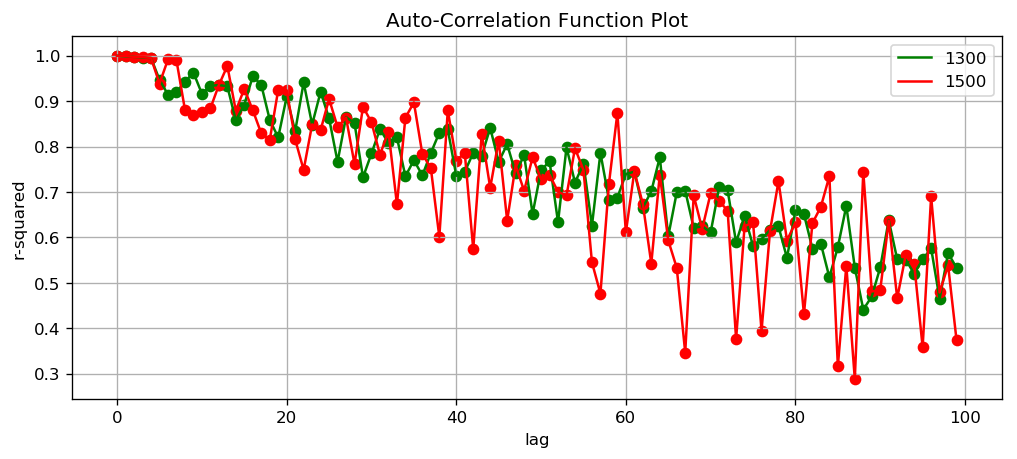

In [12]:
delay_list=[]
score_list1=[]
score_list2=[]
for count in np.arange(100).tolist():
    score1=plot_acf(dataframe=aapl_data,dataframe_attribute='Close',lag=count,lag_max=100,training_size=1300)
    score2=plot_acf(dataframe=aapl_data,dataframe_attribute='Close',lag=count,lag_max=100,training_size=1500)
    delay_list.append(count)
    score_list1.append(score1)
    score_list2.append(score2)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,4),dpi=120)

ax.plot(delay_list,score_list1,color='green',label=1300)
ax.plot(delay_list,score_list2,color='red',label=1500)

ax.scatter(delay_list,score_list1,color='green',alpha=1)
ax.scatter(delay_list,score_list2,color='red',alpha=1)

ax.grid()
ax.set_xlabel('lag')
ax.set_ylabel('r-squared')
ax.set_title('Auto-Correlation Function Plot')

ax.legend()